# Clustering and Machine Learning
 Advanced Parameter Optimization

## NOT FINISHED
JUST POSTING IN CASE SOME ONE LOOKS and wants to see what I'm working on...

### Dependancies

In [68]:
import csv
import numpy as np
import pandas as pd
import random
import statistics as st
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
from  matplotlib.colors import LinearSegmentedColormap
import matplotlib.lines as mlines
from sklearn import tree, linear_model
from sklearn.svm import SVR
from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error
from sklearn.cluster import MiniBatchKMeans, KMeans
from sklearn.metrics.pairwise import pairwise_distances_argmin

np.set_printoptions(threshold=np.nan)
pd.set_option('display.max_columns', None)

### Interactive Plotting
There

In [11]:
# %matplotlib notebook

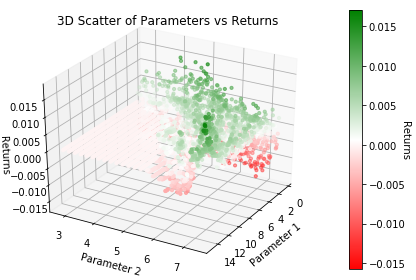

In [3]:
data = pd.read_csv('/Users/XXI/Desktop/BacktestResults.csv', header = 0)
data = np.array(data)

fig = plt.figure()
ax = fig.add_subplot(1,1,1, projection='3d')
cmap = LinearSegmentedColormap.from_list('rg',['r', 'w', 'g'], N=256) 
img = ax.scatter(data[:, 1], data[:, 2], data[:, 0], c = data[:, 0], s=10, cmap = cmap)
cbar = plt.colorbar(img)
cbar.set_label('Returns', rotation=270)
plt.title('3D Scatter of Parameters vs Returns')
plt.xlabel('Parameter 1')
plt.ylabel('Parameter 2')
ax.set_zlabel('Returns')
ax.view_init(30, 30)
plt.tight_layout()

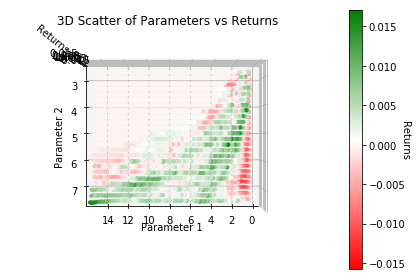

In [4]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1, projection='3d')
cmap = LinearSegmentedColormap.from_list('rg',['r', 'w', 'g'], N=256) 
img = ax.scatter(data[:, 1], data[:, 2], data[:, 0], c = data[:, 0], s=10, cmap = cmap)
cbar = plt.colorbar(img)
cbar.set_label('Returns', rotation=270)
plt.title('3D Scatter of Parameters vs Returns')
plt.xlabel('Parameter 1')
plt.ylabel('Parameter 2')
ax.set_zlabel('Returns')
ax.view_init(90, 90)
plt.tight_layout()

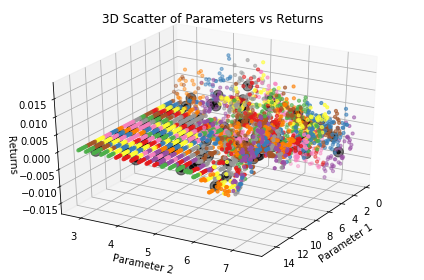

In [45]:
kmeans = KMeans(n_clusters=100)
k_means = kmeans.fit(data)
y_kmeans = k_means.predict(data)

fig = plt.figure()
ax = fig.add_subplot(1,1,1, projection='3d')
ax.scatter(data[:, 1], data[:, 2], data[:, 0], c=y_kmeans, s=10, cmap='Set1')
ax.scatter(k_means.cluster_centers_[:, 1], k_means.cluster_centers_[:, 2], k_means.cluster_centers_[:, 0], c='k', s=15, alpha=0.75)
ax.scatter(k_means.cluster_centers_[:, 1], k_means.cluster_centers_[:, 2], k_means.cluster_centers_[:, 0], c='k', s=100, alpha=0.5)
plt.title('3D Scatter of Parameters vs Returns')
plt.xlabel('Parameter 1')
plt.ylabel('Parameter 2')
ax.set_zlabel('Returns')
ax.view_init(30, 30)

plt.tight_layout()

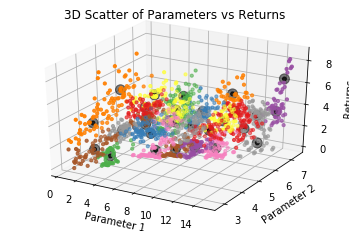

In [58]:
profitable = data[data[:, 0] > 0.0001]
profitable[:, 0] = profitable[:, 0]*500

n_per_group = 50
kmeans = KMeans(n_clusters=int(len(profitable)/n_per_group))
k_means = kmeans.fit(profitable)
y_kmeans = k_means.predict(profitable)

fig = plt.figure()
ax = fig.add_subplot(1,1,1, projection='3d')
ax.scatter(profitable[:, 1], profitable[:, 2], profitable[:, 0], c=y_kmeans, s=10, cmap='Set1')
ax.scatter(k_means.cluster_centers_[:, 1], k_means.cluster_centers_[:, 2], k_means.cluster_centers_[:, 0], c='k', s=15, alpha=0.75)
ax.scatter(k_means.cluster_centers_[:, 1], k_means.cluster_centers_[:, 2], k_means.cluster_centers_[:, 0], c='k', s=100, alpha=0.5)
plt.title('3D Scatter of Parameters vs Returns')
plt.xlabel('Parameter 1')
plt.ylabel('Parameter 2')
ax.set_zlabel('Returns')
# ax.view_init(30, 30)

labels = k_means.labels_
centers = k_means.cluster_centers_

Finding stuff
show pick best prof, bu suggest use high transacions nubmer

In [83]:
clusters = pd.DataFrame(np.zeros((int(len(labels)/n_per_group), 4)), index=np.arange(0, int(len(labels)/n_per_group)), columns=['Tot. Cluster Return', 'Center Return', 'Center Pram. 1', 'Center Pram. 2'])
# print(clusters)

for i in range(0, len(labels)):
    clusters.loc[labels[i], 'Tot. Cluster Return'] += profitable[i, 0]

for i in range(0, len(centers)):
    clusters.loc[i, 1:] = [centers[i, 0], centers[i, 1], centers[i, 2]]
    
print('Sorted by Total Cluster Return\n')
print(clusters.sort_values('Tot. Cluster Return', ascending=False).head())

print('\n\n\nSorted by Center Cluster Return\n')
print(clusters.sort_values('Center Return', ascending=False).head())

Sorted by Total Cluster Return

    Tot. Cluster Return  Center Return  Center Pram. 1  Center Pram. 2
13           260.277125       5.537811        2.019149        4.948936
1            210.696729       3.192375        2.751515        5.887879
17           201.043608       4.569173        3.838636        5.845455
7            184.182620       3.683652        4.970000        6.888000
27           183.681890       3.011179       12.391803        7.003279



Sorted by Center Cluster Return

    Tot. Cluster Return  Center Return  Center Pram. 1  Center Pram. 2
12            89.026362       6.359026       14.335714        7.400000
13           260.277125       5.537811        2.019149        4.948936
14           173.445637       4.955590       10.340000        6.702857
17           201.043608       4.569173        3.838636        5.845455
7            184.182620       3.683652        4.970000        6.888000


### Train and Test Data


In [64]:
parameters = np.vstack((data[:, 1], data[:, 2])).T
returns = np.array(data[:, 0])

testers = np.linspace(0, len(data)-1, int((len(data)-1)*.2))
for i in range(0, len(testers)):
    testers[i] = int(testers[i])

testParameters, testReturns = [], []
for i in testers:
    testParameters.append([data[int(i), 1], data[int(i), 2]])
    testReturns.append(data[int(i), 0])
    parameters[int(i), :] = [np.nan, np.nan]
    returns[int(i)] = np.nan

parameters = pd.DataFrame(parameters)
parameters = np.array(parameters.dropna())

returns = returns[np.isfinite(returns)]

### Model Selection

[chart](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html)

In [65]:
clf_SGD = linear_model.SGDRegressor(max_iter=1000)
clf_SVR = SVR(kernel='linear', gamma='auto')
clf_ridge = linear_model.Ridge()
clf_tree = tree.DecisionTreeRegressor()

clf_SGD.fit(parameters, returns)
clf_SVR.fit(parameters, returns)
clf_ridge.fit(parameters, returns)
clf_tree.fit(parameters, returns)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [67]:
scores = pd.DataFrame(np.zeros((3, 4)), index=['Absolute Error', 'Variance Score', 'Mean Sq. Error'], columns=['SGD', 'SVR', 'Ridge', 'Tree'])

pred_SGD = clf_SGD.predict(testParameters)
scores.loc['Absolute Error', 'SGD'] = mean_absolute_error(testReturns, pred_SGD)
scores.loc['Variance Score', 'SGD'] = explained_variance_score(testReturns, pred_SGD)
scores.loc['Mean Sq. Error', 'SGD'] = mean_squared_error(testReturns, pred_SGD)

pred_SVR = clf_SVR.predict(testParameters)
scores.loc['Absolute Error', 'SVR'] = mean_absolute_error(testReturns, pred_SVR)
scores.loc['Variance Score', 'SVR'] = explained_variance_score(testReturns, pred_SVR)
scores.loc['Mean Sq. Error', 'SVR'] = mean_squared_error(testReturns, pred_SVR)

pred_ridge = clf_ridge.predict(testParameters)
scores.loc['Absolute Error', 'Ridge'] = mean_absolute_error(testReturns, pred_ridge)
scores.loc['Variance Score', 'Ridge'] = explained_variance_score(testReturns, pred_ridge)
scores.loc['Mean Sq. Error', 'Ridge'] = mean_squared_error(testReturns, pred_ridge)

pred_tree = clf_tree.predict(testParameters)
scores.loc['Absolute Error', 'Tree'] = mean_absolute_error(testReturns, pred_tree)
scores.loc['Variance Score', 'Tree'] = explained_variance_score(testReturns, pred_tree)
scores.loc['Mean Sq. Error', 'Tree'] = mean_squared_error(testReturns, pred_tree)

print(scores)

                     SGD       SVR     Ridge      Tree
Absolute Error  0.002485  0.002726  0.002475  0.001068
Variance Score  0.064708  0.000000  0.064939  0.770802
Mean Sq. Error  0.000014  0.000015  0.000014  0.000003
